In [17]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set(style='whitegrid')

In [18]:
# Load dataset
df = pd.read_csv('Food_Inspections.csv')
df.shape

(41663, 38)

In [19]:
# Quick peek
df.head()

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude,X_WebMercator,Y_WebMercator
0,-1.037826e+07,5.617459e+06,1,LIC366861,RESTAURANT,GRADUATE MINNEAPOLIS HOTEL,1,615 WASHINGTON AVE SE,615.0,NaN,...,0,100,-1,2502924110010,2.0,University of Minnesota,44.97419,-93.22952,-1.037826e+07,5.617459e+06
1,-1.037826e+07,5.617459e+06,2,LIC366861,RESTAURANT,GRADUATE MINNEAPOLIS HOTEL,1,615 WASHINGTON AVE SE,615.0,NaN,...,0,100,831126,2502924110010,2.0,University of Minnesota,44.97419,-93.22952,-1.037826e+07,5.617459e+06
2,-1.037718e+07,5.617350e+06,3,LIC384196,RESTAURANT,LEGENDARY SPICE,1,2501 UNIVERSITY AVE SE,2501.0,NaN,...,0,94,-1,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983,-1.037718e+07,5.617350e+06
3,-1.037718e+07,5.617350e+06,4,LIC384196,RESTAURANT,LEGENDARY SPICE,1,2501 UNIVERSITY AVE SE,2501.0,NaN,...,2,94,830766,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983,-1.037718e+07,5.617350e+06
4,-1.037718e+07,5.617350e+06,5,LIC384196,RESTAURANT,LEGENDARY SPICE,1,2501 UNIVERSITY AVE SE,2501.0,NaN,...,4,94,830767,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983,-1.037718e+07,5.617350e+06


In [20]:
# Info and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41663 entries, 0 to 41662
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X                       41663 non-null  float64
 1   Y                       41663 non-null  float64
 2   OBJECTID                41663 non-null  int64  
 3   HealthFacilityIDNumber  41663 non-null  object 
 4   FacilityCategory        41663 non-null  object 
 5   BusinessName            41663 non-null  object 
 6   RiskLevel               41663 non-null  int64  
 7   FullAddress             41646 non-null  object 
 8   AddrNum                 41646 non-null  float64
 9   AddrNumSuffix           76 non-null     object 
 10  StreetName              41646 non-null  object 
 11  StreetType              40395 non-null  object 
 12  PostDir                 30031 non-null  object 
 13  Unit                    5397 non-null   object 
 14  City                    41646 non-null

In [21]:
# Summary statistics
df.describe(include='all')

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,BusinessName,RiskLevel,FullAddress,AddrNum,AddrNumSuffix,...,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude,X_WebMercator,Y_WebMercator
count,4.166300e+04,4.166300e+04,41663.000000,41663,41663,41663,41663.000000,41646,41646.000000,76,...,41663.000000,41663.00000,41663.000000,41369,41013.000000,41013,41663.000000,41663.000000,4.166300e+04,4.166300e+04
unique,NaN,NaN,NaN,2926,16,2510,NaN,2229,NaN,1,...,NaN,NaN,NaN,1779,NaN,87,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,LIC413413,RESTAURANT,ORIGAMI TIGER SUSHI LLC,NaN,1354 LAGOON AVE,NaN,1/2,...,NaN,NaN,NaN,3502924349000,NaN,Downtown West,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,336,31475,336,NaN,336,NaN,76,...,NaN,NaN,NaN,1216,NaN,5498,NaN,NaN,NaN,NaN
mean,-1.024365e+07,5.541029e+06,20832.000000,NaN,NaN,NaN,1.283417,NaN,1707.224968,NaN,...,1.037995,91.00420,741301.897151,NaN,6.640187,NaN,44.364466,-92.020301,-1.024365e+07,5.541029e+06
std,1.192439e+06,6.450306e+05,12027.216469,NaN,NaN,NaN,0.575853,NaN,1470.531043,NaN,...,1.488751,8.10549,319400.942044,NaN,3.207004,NaN,5.164420,10.711861,1.192439e+06,6.450306e+05
min,-1.038932e+07,0.000000e+00,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,...,0.000000,44.00000,-1.000000,NaN,1.000000,NaN,0.000000,-93.328830,-1.038932e+07,0.000000e+00
25%,-1.038410e+07,5.613439e+06,10416.500000,NaN,NaN,NaN,1.000000,NaN,505.000000,NaN,...,0.000000,88.00000,837814.500000,NaN,4.000000,NaN,44.948640,-93.281920,-1.038410e+07,5.613439e+06
50%,-1.038262e+07,5.616559e+06,20832.000000,NaN,NaN,NaN,1.000000,NaN,1301.000000,NaN,...,0.000000,94.00000,869819.000000,NaN,7.000000,NaN,44.968470,-93.268680,-1.038262e+07,5.616559e+06
75%,-1.038073e+07,5.618455e+06,31247.500000,NaN,NaN,NaN,1.000000,NaN,2632.000000,NaN,...,2.000000,96.00000,898803.000000,NaN,9.000000,NaN,44.980520,-93.251720,-1.038073e+07,5.618455e+06


In [22]:
# Keep only requested columns and do basic row filtering
keep = [
    'X', 'Y', 'OBJECTID', 'HealthFacilityIDNumber', 'FacilityCategory',
    'BusinessName', 'RiskLevel', 'FullAddress', 'AddrNum',
    'StreetName', 'InspectionType', 'InspectionResult',
    'DateOfInspection', 'InspectionIDNumber',
    'ViolationPriority', 'FoodCodeItem',
    'YearOfInspection', 'ViolationStatus', 'ViolationPoints',
    'InspectionScore', 'ViolationIDNumber', 'APN', 'Ward', 'Neighborhood',
    'Latitude', 'Longitude'
]
# keep only columns that exist in the dataframe (tolerant)
existing = [c for c in keep if c in df.columns]
missing = [c for c in keep if c not in df.columns]
print('Keeping columns (found):', existing)
if missing:
    print('Missing columns (not present in CSV):', missing)
df = df[existing].copy()
# Drop rows missing both BusinessName and FullAddress if those columns exist, otherwise drop rows that are all-NA
drop_before = len(df)
if 'BusinessName' in df.columns and 'FullAddress' in df.columns:
    df = df.dropna(subset=['BusinessName','FullAddress'], how='any')
else:
    df = df.dropna(how='all')
drop_after = len(df)
print(f'Dropped {drop_before - drop_after} rows; remaining {drop_after} rows')
# Save cleaned CSV for downstream work
df.to_csv('cleaned_food_inspections.csv', index=False)
print('Saved cleaned_food_inspections.csv')

Keeping columns (found): ['X', 'Y', 'OBJECTID', 'HealthFacilityIDNumber', 'FacilityCategory', 'BusinessName', 'RiskLevel', 'FullAddress', 'AddrNum', 'StreetName', 'InspectionType', 'InspectionResult', 'DateOfInspection', 'InspectionIDNumber', 'ViolationPriority', 'FoodCodeItem', 'YearOfInspection', 'ViolationStatus', 'ViolationPoints', 'InspectionScore', 'ViolationIDNumber', 'APN', 'Ward', 'Neighborhood', 'Latitude', 'Longitude']
Dropped 17 rows; remaining 41646 rows
Saved cleaned_food_inspections.csv


In [23]:
# Create unique identifier combining APN and BusinessName
import re
# ensure columns exist so the function is tolerant
if 'APN' not in df.columns:
    df['APN'] = ''
if 'BusinessName' not in df.columns:
    df['BusinessName'] = ''
def make_uid(row):
    apn = str(row.get('APN') or '').strip()
    name = str(row.get('BusinessName') or '').strip()
    if apn:
        key = f"{apn}|{name}"
    else:
        key = name
    key = key.lower()
    key = re.sub(r'[^0-9a-z ]','', key)
    key = re.sub(r'\s+',' ', key).strip()
    return key
df['unique_id'] = df.apply(make_uid, axis=1)
print('Created `unique_id` column; sample values:')
print(df['unique_id'].head(10).tolist())
print('Total unique ids:', df['unique_id'].nunique())

Created `unique_id` column; sample values:
['2502924110010graduate minneapolis hotel', '2502924110010graduate minneapolis hotel', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice', '3002923240059legendary spice']
Total unique ids: 2678


In [24]:
inpections_subset = df[[
    'X', 'Y', 'OBJECTID', 'HealthFacilityIDNumber', 'FacilityCategory','unique_id',
    'BusinessName', 'RiskLevel', 'AddrNum',
    'StreetName', 'InspectionType', 'InspectionResult',
    'DateOfInspection', 'InspectionIDNumber',
    'ViolationPriority', 'FoodCodeItem',
    'YearOfInspection', 'ViolationStatus', 'ViolationPoints',
    'InspectionScore', 'ViolationIDNumber', 'APN', 'Ward', 'Neighborhood',
    'Latitude', 'Longitude']
]
inpections_subset.head()

,X,Y,OBJECTID,HealthFacilityIDNumber,FacilityCategory,unique_id,BusinessName,RiskLevel,AddrNum,StreetName,...,YearOfInspection,ViolationStatus,ViolationPoints,InspectionScore,ViolationIDNumber,APN,Ward,Neighborhood,Latitude,Longitude
0,-1.037826e+07,5.617459e+06,1,LIC366861,RESTAURANT,2502924110010graduate minneapolis hotel,GRADUATE MINNEAPOLIS HOTEL,1,615.0,WASHINGTON,...,2023,NaN,0,100,-1,2502924110010,2.0,University of Minnesota,44.97419,-93.22952
1,-1.037826e+07,5.617459e+06,2,LIC366861,RESTAURANT,2502924110010graduate minneapolis hotel,GRADUATE MINNEAPOLIS HOTEL,1,615.0,WASHINGTON,...,2023,Observed,0,100,831126,2502924110010,2.0,University of Minnesota,44.97419,-93.22952
2,-1.037718e+07,5.617350e+06,3,LIC384196,RESTAURANT,3002923240059legendary spice,LEGENDARY SPICE,1,2501.0,UNIVERSITY,...,2023,NaN,0,94,-1,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983
3,-1.037718e+07,5.617350e+06,4,LIC384196,RESTAURANT,3002923240059legendary spice,LEGENDARY SPICE,1,2501.0,UNIVERSITY,...,2023,Observed,2,94,830766,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983
4,-1.037718e+07,5.617350e+06,5,LIC384196,RESTAURANT,3002923240059legendary spice,LEGENDARY SPICE,1,2501.0,UNIVERSITY,...,2023,Observed,4,94,830767,3002923240059,2.0,Prospect Park - East River Road,44.97350,-93.21983


In [25]:
# Missing values by column
df.isnull().sum()

X                            0
Y                            0
OBJECTID                     0
HealthFacilityIDNumber       0
FacilityCategory             0
BusinessName                 0
RiskLevel                    0
FullAddress                  0
AddrNum                      0
StreetName                   0
InspectionType               0
InspectionResult             0
DateOfInspection             0
InspectionIDNumber           0
ViolationPriority         6465
FoodCodeItem              6465
YearOfInspection             0
ViolationStatus           6465
ViolationPoints              0
InspectionScore              0
ViolationIDNumber            0
APN                        277
Ward                       633
Neighborhood               633
Latitude                     0
Longitude                    0
unique_id                    0
dtype: int64

/tmp/ipykernel_42843/3080345972.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  inspections = df.set_index(dcol).resample('M').size()


/tmp/ipykernel_42843/3080345972.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  inspections = df.set_index(dcol).resample('M').size()


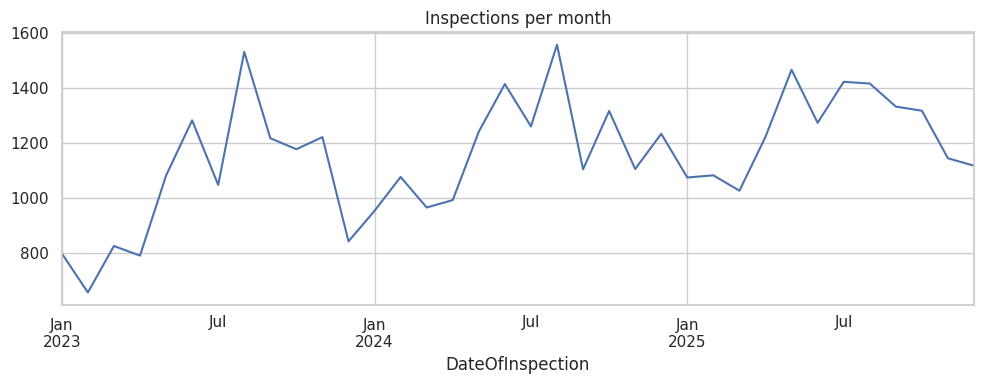

/tmp/ipykernel_42843/3080345972.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  inspections = df.set_index(dcol).resample('M').size()


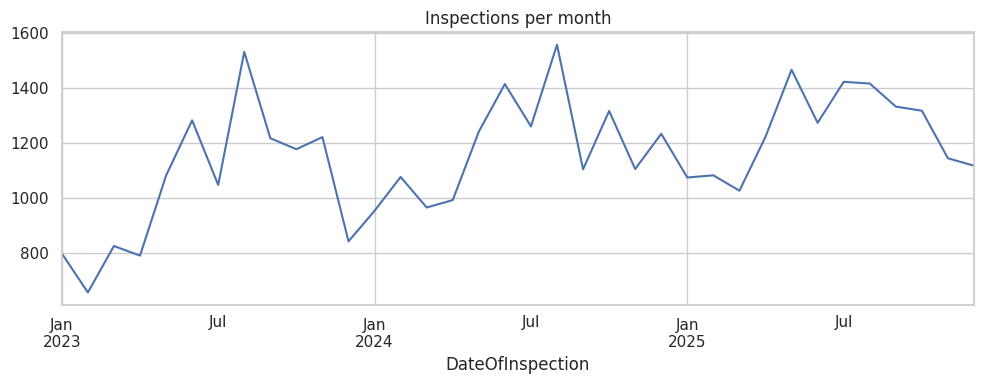

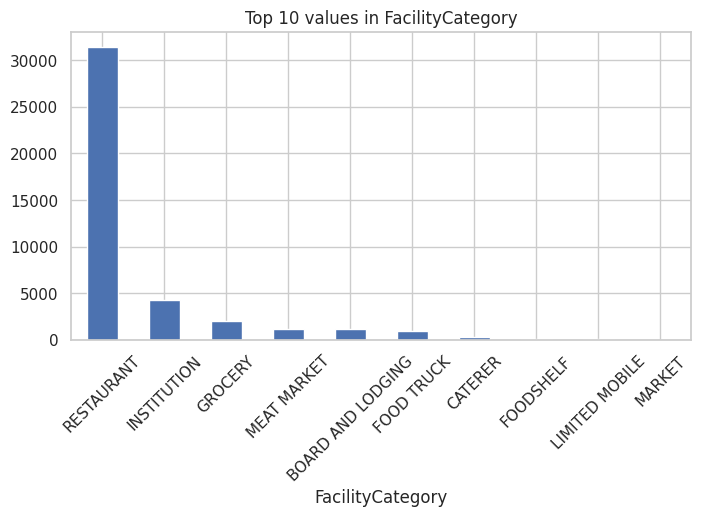

In [26]:
# Example visualizations
# 1) Score distribution (if present)
if 'Score' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['Score'].dropna(), kde=True)
    plt.title('Score distribution')

# 2) Inspections over time (if date column present)
date_cols = [c for c in df.columns if 'date' in c.lower() or 'inspection date' in c.lower()]
if date_cols:
    # take the first matched date column
    dcol = date_cols[0]
    df[dcol] = pd.to_datetime(df[dcol], errors='coerce')
    inspections = df.set_index(dcol).resample('M').size()
    inspections.plot(figsize=(10,4), title='Inspections per month')
    plt.tight_layout()

# 3) Top categories example (if a categorical column exists e.g., 'Facility Type' or 'Violation')
cat_candidates = [c for c in df.columns if df[c].nunique(dropna=True) < 200 and df[c].dtype == 'object']
if cat_candidates:
    top_col = cat_candidates[0]
    plt.figure(figsize=(8,4))
    df[top_col].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Top 10 values in {top_col}')
    plt.xticks(rotation=45)

In [30]:
# (Add cleaning steps below as you iterate)
inpections_subset.to_csv('cleaned_food_inspections_sample.csv', index=False)
print('Saved cleaned_food_inspections_sample.csv')

Saved cleaned_food_inspections_sample.csv


## Next steps
- Perform column-specific cleaning (dates, geocoding).
- Create more visuals: maps, violation timelines, inspections by neighborhood.
- Save final cleaned dataset and document assumptions.
- Combine Buisness name and APN for a unique identifier since some locations have multiple locations (for example subway)